# Load and plot results from eval script runs

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

from pprint import pprint

In [2]:
res_file_path = (
    "/Users/szepi1991/Code/adaptive_time/code/adaptive_time/tradeoff_results_20240228-140947.pkl"
)

# MAKE SURE THIS IS THE SAME AS IN code/adaptive_time/notebooks/policy_eval_ground_truth.ipynb
base_policy_returns = [13811.823415783701, 26.83463996869155]

with open(res_file_path, "rb") as f:
    loaded = pickle.load(f)
    if "results" in loaded:
        results = loaded["results"]
        print("The config for these results was: ")
        pprint(loaded["config"])
        policy_prob = loaded["config"]["policy_to_evaluate"][2]
    else:
        results = loaded
        policy_prob = None
        print("Could not find a config.")

if policy_prob:
    expected_return = np.dot(base_policy_returns, [policy_prob, 1.0 - policy_prob])
    print()
    print("expected_return:", expected_return)

The config for these results was: 
{'budget': 20000,
 'budget_type': <BudgetType.UPDATES: 2>,
 'do_weighing': True,
 'epsilon': 0.0,
 'gamma': 0.99999,
 'max_env_steps': None,
 'num_runs': 2,
 'policy_to_evaluate': ('/Users/szepi1991/Code/adaptive_time/policy_to_eval_good.npy',
                        '/Users/szepi1991/Code/adaptive_time/policy_to_eval_bad.npy',
                        0.5),
 'save_limit': None,
 'seed': 13,
 'tau': 0.02,
 'termination_prob': 0,
 'weights_to_evaluate': None}

expected_return: 6919.329027876196


In [3]:
results.keys()

dict_keys(['q0_10', 'q0_5', 'q0_1', 'u5', 'u10', 'u20'])

In [4]:
print("number of runs:", len(results['q0_10']))

number of runs: 2


In [5]:
print("recorded stats:")
pprint(list(results['q0_10'][0].keys()))

recorded stats:
['total_return',
 'total_pivots',
 'total_interactions',
 'num_episode',
 'returns_per_episode_q',
 'predicted_returns_q',
 'returns_per_episode_v',
 'predicted_returns_v']


The following is only true if we used an interaction budget. If we
used an update budget, we can run some methods longer.

Let's do a minor sanity check. Since we used no randomness (?), ALL
runs should have the same number of episodes, and each corresponding
episode should have the same number of interactions.

In [6]:
print("Numbers of episodes:")
max_episodes = 0
for name, runs_data in results.items():
    num_episodes = [len(run["returns_per_episode_v"]) for run in runs_data]
    max_episodes = max(max_episodes, max(num_episodes))
    print(f" * {name}: {num_episodes}")

Numbers of episodes:
 * q0_10: [810, 848]
 * q0_5: [511, 526]
 * q0_1: [25, 16]
 * u5: [13, 10]
 * u10: [35, 22]
 * u20: [53, 47]


In [7]:
def plot_stuff(tuples_of_x_y_labels_kwargs, title, ylabel, show):

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for x, y, label, kwargs in tuples_of_x_y_labels_kwargs:
        plt.plot(x, y, label=label, **kwargs)

    plt.ylabel(ylabel, rotation=0, labelpad=40)
    plt.legend()

    if title is not None:
      plt.title(title)

    if show:
      plt.show()
    return ax


### Some basic exploration of the data

In [8]:
pprint(list(results["q0_10"][0].keys()))

['total_return',
 'total_pivots',
 'total_interactions',
 'num_episode',
 'returns_per_episode_q',
 'predicted_returns_q',
 'returns_per_episode_v',
 'predicted_returns_v']


In [9]:
expected_return

6919.329027876196

In [10]:
pprint(np.stack(results["u5"][0]["returns_per_episode_v"]))

array([13811.82341578,    26.83463997, 13811.82341578, 13811.82341578,
          26.83463997, 13811.82341578, 13811.82341578,    26.83463997,
          26.83463997,    26.83463997,    26.83463997, 13811.82341578,
       13811.82341578])


In [11]:
pprint(np.stack(results["u5"][0]["predicted_returns_v"]))

array([16996.69154068, 11937.4936339 , 13641.94717431, 14005.72096876,
       11767.97097694, 12244.8110449 , 12485.08356401, 11158.82563514,
       10044.77510372,  9116.56225871,  8337.9549018 ,  8807.37304616,
        9174.11176228])


In [12]:
pprint(np.stack(results["u5"][0]["returns_per_episode_q"]))

array([[13811.82341578,            nan],
       [           nan,    26.83463997],
       [13811.82341578,            nan],
       [13811.82341578,            nan],
       [           nan,    26.83463997],
       [13811.82341578,            nan],
       [13811.82341578,            nan],
       [           nan,    26.83463997],
       [           nan,    26.83463997],
       [           nan,    26.83463997],
       [           nan,    26.83463997],
       [13811.82341578,            nan],
       [13811.82341578,            nan]])


In [13]:
pprint(np.stack(results["u5"][0]["predicted_returns_q"]))

array([[16996.69154068, 26351.18053946],
       [17015.72298816,  6859.26427964],
       [15917.46268469,  9090.91615355],
       [15236.20842466, 10314.25860109],
       [15236.18263846,  6565.65348466],
       [14762.28439632,  7209.86434205],
       [14409.51561334,  7674.00344069],
       [14409.51833363,  5741.00447099],
       [14409.51970758,  4588.8443489 ],
       [14409.52053647,  3823.60398094],
       [14409.52109094,  3278.31641086],
       [14134.84183663,  3479.90425569],
       [13913.94694196,  3644.30405266]])


In [14]:
pprint(np.stack(results["q0_5"][0]["predicted_returns_q"]))

array([[ 1.38115634e+04, -5.55241788e+04],
       [ 1.38115556e+04, -2.13184898e+02],
       [ 1.38116314e+04, -3.48166011e+02],
       ...,
       [ 1.38117926e+04,  3.79080483e+01],
       [ 1.38117926e+04,  3.78637760e+01],
       [ 1.38117927e+04,  3.78995195e+01]])


In [25]:
pprint(np.stack(results["q0_5"][0]["predicted_returns_v"]))

array([13811.56337066,  6799.18534457,  9091.69894238, 10252.30938487,
        8207.21017869,  9133.4222915 ,  9797.62164715,  8576.27178169,
        7626.33475096,  6866.38529777,  6244.60842939,  6873.78391592,
        7406.78993532,  6879.65102989,  6422.79716564,  6023.04993459,
        5670.33171947,  6122.46249564,  5801.64034546,  5512.90035631,
        5251.65937331,  5640.80985821,  5396.72424365,  5172.9790647 ,
        5518.7080856 ,  5307.48242029,  5622.71262905,  5422.8600898 ,
        5712.43921973,  5522.91931823,  5345.62648211,  5179.41442756,
        5023.2758136 ,  5282.06818626,  5526.10826561,  5756.61893035,
        5601.76011566,  5818.16989898,  6023.49952898,  6218.5771051 ,
        6404.15047111,  6580.89665364,  6749.43001237,  6910.30929902,
        6757.34353747,  6611.02843356,  6764.58875958,  6911.7550081 ,
        6771.24673792,  6912.39665421,  6777.38592819,  6912.99175435,
        7043.48267619,  7169.14247798,  7290.23435462,  7407.00274231,
      

In [15]:
# def pad_along_axis(
#         array: np.ndarray, target_length: int, axis: int = 0, pad_value=0.0
# ) -> np.ndarray:

#     pad_size = target_length - array.shape[axis]

#     if pad_size <= 0:
#         return array

#     npad = [(0, 0)] * array.ndim
#     npad[axis] = (0, pad_size)

#     return np.pad(
#         array, pad_width=npad, mode='constant', constant_values=pad_value)


def pad_combine(list_of_vecs, pad_value=np.nan):
    # print(list_of_vecs)
    # print("original shapes")
    # for p in list_of_vecs:
    #     print(p.shape)

    max_len = max([len(v) for v in list_of_vecs])
    padded = [
        np.pad(v, (0, max_len - len(v)), mode='constant', constant_values=pad_value)
        # pad_along_axis(v, max_len, axis=0, pad_value=pad_value)
        for v in list_of_vecs
    ]
    # print("padded shapes")
    # for p in padded:
    #     print(p.shape)
    # print("---")
    return np.stack(padded, axis=1)

In [16]:
preds_per_method = {}   # nethod -> [traj_len, n_runs] of pred Vs
rets_per_method = {}     # nethod -> [traj_len, n_runs] of est Vs
for name in results.keys():
    # if name != "u5":
    #     continue
    print("=== processing ", name)
    preds_per_method[name] = pad_combine([
        np.array(run["predicted_returns_v"])
        for run in results[name]
    ])
    rets_per_method[name] = pad_combine([
        np.array(run["returns_per_episode_v"])
        for run in results[name]
    ])

# At this point, we combined all runs of each method into
# a single array of shape [traj_len, n_runs]


=== processing  q0_10
=== processing  q0_5
=== processing  q0_1
=== processing  u5
=== processing  u10
=== processing  u20


#### Empirical return estimate

In [17]:
for name, rets_ar in rets_per_method.items():
    print(f"name {name}:\n", np.nanmean(rets_ar))


name q0_10:
 6969.214391359242
name q0_5:
 6939.26874163099
name q0_1:
 6751.219408658941
name u5:
 8417.697373073479
name u10:
 6798.40807370238
name u20:
 7470.728578908795


In [18]:
rets_per_method["u5"]

array([[13811.82341578, 13811.82341578],
       [   26.83463997,    26.83463997],
       [13811.82341578, 13811.82341578],
       [13811.82341578,    26.83463997],
       [   26.83463997, 13811.82341578],
       [13811.82341578, 13811.82341578],
       [13811.82341578,    26.83463997],
       [   26.83463997, 13811.82341578],
       [   26.83463997, 13811.82341578],
       [   26.83463997, 13811.82341578],
       [   26.83463997,            nan],
       [13811.82341578,            nan],
       [13811.82341578,            nan]])

In [19]:
preds_per_method["u5"]

array([[16996.69154068, 16996.69154068],
       [11937.4936339 , 11937.4936339 ],
       [13641.94717431, 13641.94717431],
       [14005.72096876, 10764.48597947],
       [11767.97097694, 11767.97097694],
       [12244.8110449 , 12244.81104494],
       [12485.08356401, 10728.46949866],
       [11158.82563514, 11158.8256352 ],
       [10044.77510372, 11437.37651631],
       [ 9116.56225871, 11624.2683004 ],
       [ 8337.9549018 ,            nan],
       [ 8807.37304616,            nan],
       [ 9174.11176228,            nan]])

## Plots of Average Behaviour

In [20]:
# results = results[0]


# plot_est_vs_pred([
#    (average_returns, 'Empirical Returns', {}),
#    (predicted_returns, 'Predicted Returns', {})],
#    title='Empirical vs Predicted Returns')


## Plots of individual runs

### Plot of sample returns -- by episodes

Since we are doing evaluation and there is no randomness at this point,
these should be the same accross all runs and all methods!

In [21]:
for row in rets_per_method["q0_10"].T:
    print(row.shape)

(848,)
(848,)


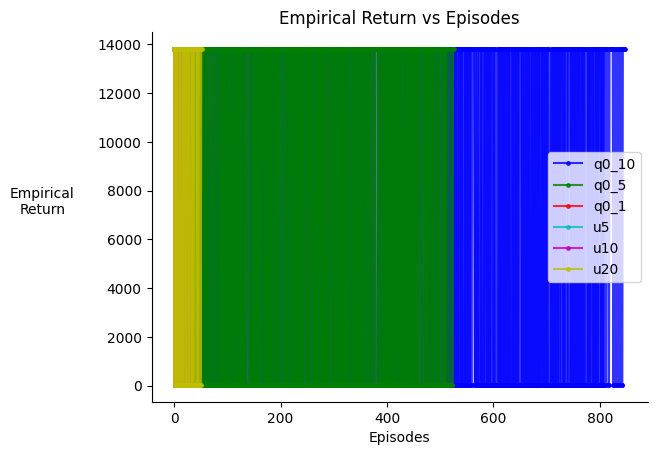

In [22]:

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_y_labels_kwargs = []
for i, (name, array_of_runs) in enumerate(rets_per_method.items()):
    for r_idx, est_rets in enumerate(array_of_runs.T):
        tuples_of_y_labels_kwargs.append((
            list(range(len(est_rets))),
            est_rets,
            name if r_idx==0 else None,
            # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
            {"color": colors[i], "marker": ".", "linestyle": "-",
             "markersize": 5, "alpha": 0.8}
        ))

ax = plot_stuff(
    tuples_of_y_labels_kwargs, "Empirical Return vs Episodes",
    "Empirical\nReturn" ,False)
# ax.set_yscale('log')
ax.set_xlabel('Episodes')
plt.show()



It is kind of surprising at first that some go longer than others. It's because we ran with an update budget and some methods make fewer updates per episode.

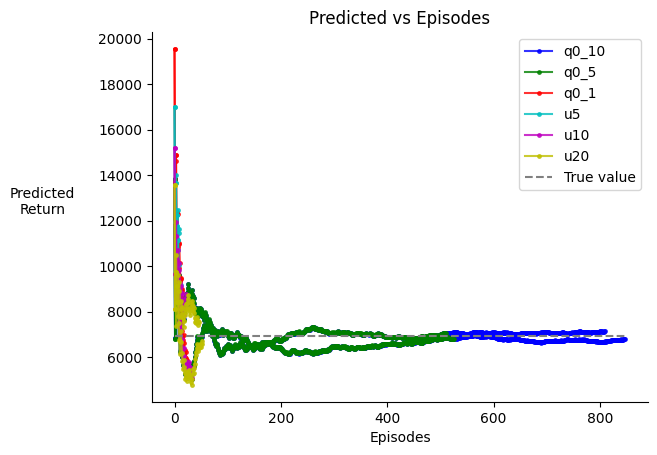

In [23]:
# Against episodes.

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_y_labels_kwargs = []
for i, (name, array_of_runs) in enumerate(preds_per_method.items()):
    for r_idx, pred_rets in enumerate(array_of_runs.T):
        tuples_of_y_labels_kwargs.append((
            list(range(len(pred_rets))),
            pred_rets,
            name if r_idx==0 else None,
            # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
            {"color": colors[i], "marker": ".", "linestyle": "-",
             "markersize": 5, "alpha": 0.8}
        ))

ax = plot_stuff(
    tuples_of_y_labels_kwargs, "Predicted vs Episodes",
    "Predicted\nReturn" ,False)

plt.hlines(
    expected_return, 0, max_episodes,
    colors='grey', linestyles='dashed',
    label='True value')
ax.legend()
# ax.set_yscale('log')
ax.set_xlabel('Episodes')
plt.show()



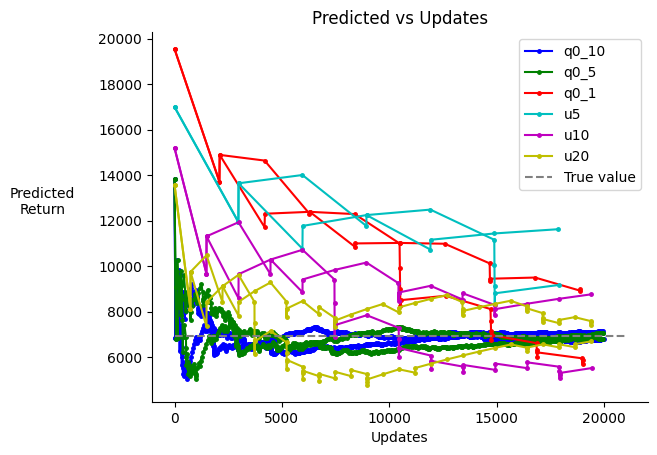

In [24]:
# Against updates.

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_x_y_labels_kwargs = []
for i, (name, array_of_runs) in enumerate(results.items()):
    for r_idx, data_for_run in enumerate(array_of_runs):
        tuples_of_x_y_labels_kwargs.append((
            data_for_run["total_pivots"][:-1],
            data_for_run["predicted_returns_v"],
            name if r_idx==0 else None,
            # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
            {"color": colors[i], "marker": ".", "linestyle": "-",
             "markersize": 5, "alpha": 1.0}
        ))

ax = plot_stuff(
    tuples_of_x_y_labels_kwargs, "Predicted vs Updates",
    "Predicted\nReturn" ,False)

min_x, max_x = ax.get_xlim()
plt.hlines(
    expected_return, 0, max_x,
    colors='grey', linestyles='dashed',
    label='True value')
ax.legend()
# ax.set_xlim(-100, 2000)
# ax.set_yscale('log')
ax.set_xlabel('Updates')
plt.show()

